In [5]:
from singlestep import *

from math import sqrt
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.engine.input_layer import Input
from keras.layers.merge import concatenate
from keras import optimizers
from keras.utils import plot_model
from keras.callbacks import History, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

In [6]:
def main():
  n_input=8
  for i in range(0,4):
    filename='fm'+str(i)+'.sav'
    print('model'+str(i)+' loaded')
  
    model = pickle.load(open(filename, 'rb'))


    data_spatial=pd.read_csv('C:\\Users\\Gyanvir\\Downloads\\BEProject_Final\\BEProject1\\Datasets\\India\\Processed\\NehruNagar_Hourly.csv',header=0,parse_dates=True,index_col=[0])
    min=data_spatial['PM2.5'].min()
    max=data_spatial['PM2.5'].max()
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_spatial = scaler.fit_transform(data_spatial)
    
    train,test=data_spatial[24*365*1:24*365*1+24*48],data_spatial[24*365*1+24*48:24*365*1+24*60]
    train=np.array(np.split(train,len(train)/24))
    test=np.array(np.split(test,len(test)/24))


    train_x,train_y=to_supervised(train,n_input,1)
    print(train_x.shape)
    print(train_y.shape)

    for j in range(31,35):
      model.get_layer(index=j).trainable=False
    model.compile(optimizer='adam',loss='mse')
    '''Above 3 lines are used for switching b/w different freezing strategies''' 
    
    history = fit_model(train_x,train_y,model,0,0)    #pretraining line....can be skipped if no finetuning needed
        
    scores,final_score= model_eval(train,test,n_input,model,24,0) #last parameter should be zero if finetuning is done.....else 1
    scores=[t*(max-min)+min for t in scores]
    print(scores)
    print(final_score*(max-min)+min)
    os.remove('best_weights0.hdf5')   #comment this line if last parameter in model_eval is set to 1



model0 loaded
(1144, 8, 20)
(1144, 1)
Train on 1029 samples, validate on 115 samples
Epoch 1/5
1029/1029 [==============================] - 25s 25ms/step - loss: 1.4859e-04 - val_loss: 1.0412e-04
Epoch 2/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.3399e-04 - val_loss: 8.4867e-05
Epoch 3/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.2241e-04 - val_loss: 7.8573e-05
Epoch 4/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.1891e-04 - val_loss: 1.3750e-04
Epoch 5/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.2913e-04 - val_loss: 9.1921e-05
model built
(288, 1)


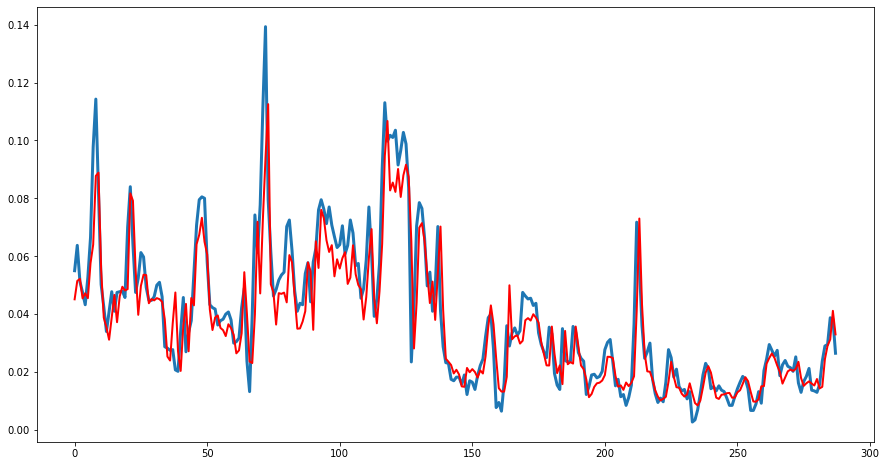

[15.941434206855932, 14.772422847815639, 6.372111126946571, 6.492968027659264, 7.962207825455422, 5.105504085137695, 4.356981305398502, 16.664319887369086, 14.03142114678589, 9.632470085218042, 5.496921190117386, 5.924200654923288, 3.2830196763966506, 6.597718621914961, 10.445644967340822, 10.023970410064127, 9.373379536581682, 9.504328245845755, 13.066213733476431, 10.600090844878418, 19.29162536866233, 9.077826414800063, 11.056466513402087, 13.655527319105529]
10.79128342473484
model1 loaded
(1144, 8, 20)
(1144, 1)
Train on 1029 samples, validate on 115 samples
Epoch 1/5
1029/1029 [==============================] - 26s 25ms/step - loss: 1.3374e-04 - val_loss: 8.8976e-05
Epoch 2/5
1029/1029 [==============================] - 15s 14ms/step - loss: 1.1340e-04 - val_loss: 9.7373e-05
Epoch 3/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.1143e-04 - val_loss: 8.1770e-05
Epoch 4/5
1029/1029 [==============================] - 15s 14ms/step - loss: 1.1082e-04 - val_los

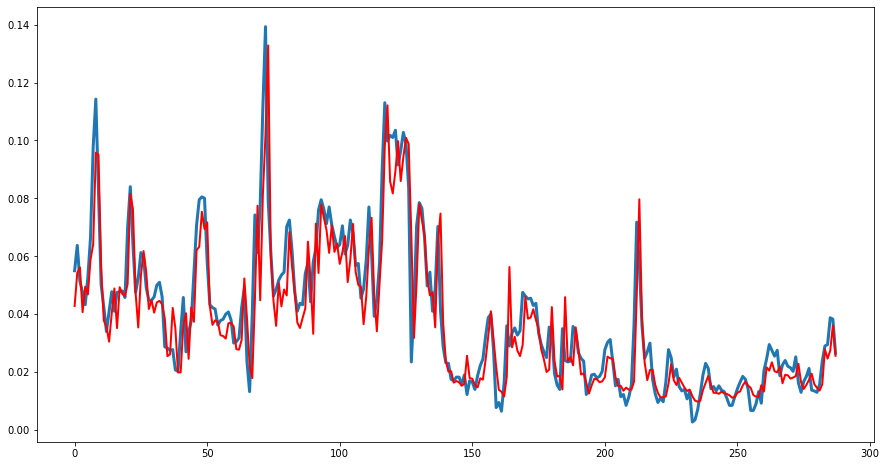

[15.231244968170916, 18.044045161397797, 5.569635245043177, 5.4031551891002065, 7.420475894421589, 3.8031365911305746, 6.938363179618215, 16.96354759374324, 11.770669648587315, 8.193099484245863, 5.359710001801946, 6.222921966730024, 4.648567862046349, 7.325991603798612, 7.289681360921055, 8.791629626901022, 10.54497049398088, 9.726197064832382, 13.976870488469638, 11.500726105875513, 18.533217511710383, 11.402207621073972, 11.906724865381285, 11.482536412405949]
10.787752122771781
model2 loaded
(1144, 8, 20)
(1144, 1)
Train on 1029 samples, validate on 115 samples
Epoch 1/5
1029/1029 [==============================] - 28s 27ms/step - loss: 1.2903e-04 - val_loss: 9.5330e-05
Epoch 2/5
1029/1029 [==============================] - 16s 15ms/step - loss: 1.1421e-04 - val_loss: 7.6698e-05
Epoch 3/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.1190e-04 - val_loss: 7.8308e-05
Epoch 4/5
1029/1029 [==============================] - 14s 14ms/step - loss: 1.1418e-04 - val_l

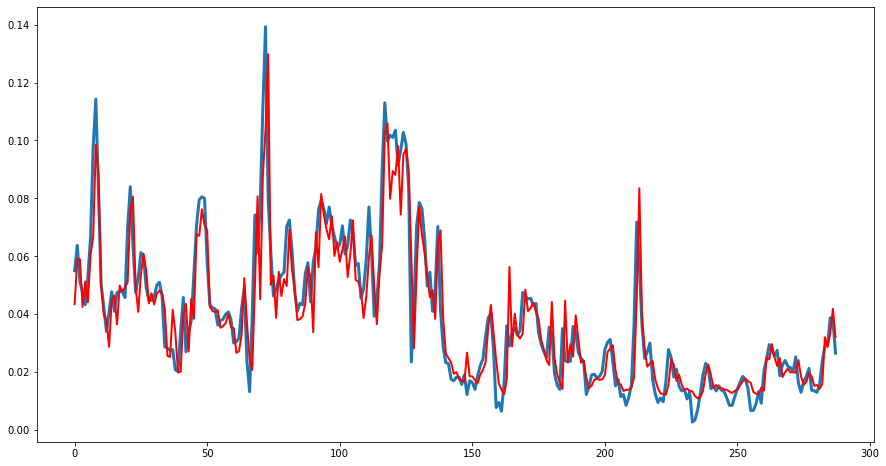

[12.780453563144986, 16.71090999931361, 6.593498581061188, 7.794166268890764, 6.838204534071551, 4.000843032785284, 4.65846809066577, 14.66219403165089, 10.746451188178323, 6.23204366470844, 5.3995153071398585, 6.352635618522838, 5.056519698189535, 7.007235760352352, 6.974688404783168, 9.168819379599206, 9.496210486838338, 9.65222175395221, 13.093699600577386, 10.829541268125602, 17.85052945111651, 11.94374002784332, 11.554249123209786, 10.447923699943527]
10.128605799309655
model3 loaded
(1144, 8, 20)
(1144, 1)
Train on 1029 samples, validate on 115 samples
Epoch 1/5
1029/1029 [==============================] - 28s 27ms/step - loss: 1.4434e-04 - val_loss: 8.1186e-05
Epoch 2/5
1029/1029 [==============================] - 15s 15ms/step - loss: 1.2229e-04 - val_loss: 9.3913e-05
Epoch 3/5
1029/1029 [==============================] - 16s 16ms/step - loss: 1.1932e-04 - val_loss: 7.6373e-05
Epoch 4/5
1029/1029 [==============================] - 16s 16ms/step - loss: 1.1769e-04 - val_loss: 7.

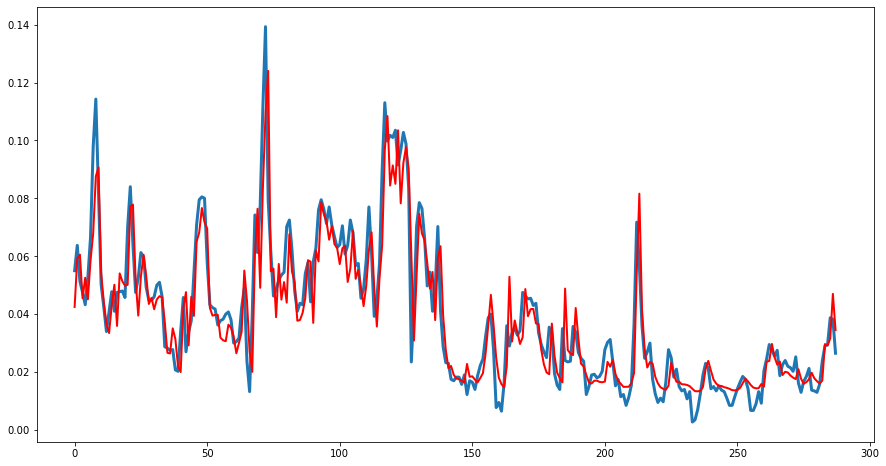

[11.654184322725865, 15.631489707380803, 6.5958816828513305, 6.9686875518838525, 6.919878761241126, 4.132127420848115, 5.389348350615567, 14.929857741991116, 14.023841625154738, 7.267224612356676, 5.725231775578925, 6.190987712750384, 2.927394052079463, 5.735791355298244, 6.148568419824686, 9.696055267206095, 9.724636019049793, 12.432596987028193, 12.563961330224087, 10.02056757387911, 15.273921099294238, 11.480836049084822, 10.744987114678485, 10.735661321657439]
9.988815751232114


In [7]:
if __name__=='__main__':
  main()